In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brats-2021-task1/BraTS2021_00495.tar
/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar
/kaggle/input/brats-2021-task1/BraTS2021_00621.tar
/kaggle/input/lgggbm-mapping-brats-2021-dataset/CLEANED TCGA LGG-GBM mapping brats 2021.csv


In [2]:
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar

./
./.DS_Store
./BraTS2021_00000/
./BraTS2021_00000/BraTS2021_00000_flair.nii.gz
./BraTS2021_00000/BraTS2021_00000_seg.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz
./BraTS2021_00000/BraTS2021_00000_t2.nii.gz
./BraTS2021_00002/
./BraTS2021_00002/BraTS2021_00002_flair.nii.gz
./BraTS2021_00002/BraTS2021_00002_seg.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz
./BraTS2021_00002/BraTS2021_00002_t2.nii.gz
./BraTS2021_00003/
./BraTS2021_00003/BraTS2021_00003_flair.nii.gz
./BraTS2021_00003/BraTS2021_00003_seg.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1ce.nii.gz
./BraTS2021_00003/BraTS2021_00003_t2.nii.gz
./BraTS2021_00005/
./BraTS2021_00005/BraTS2021_00005_flair.nii.gz
./BraTS2021_00005/BraTS2021_00005_seg.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1ce.nii.gz
./BraTS2021_00005/BraTS2021_00005_t2.nii.gz
./Bra

**1. ENVIRONMENT SETUP**

In [3]:
import subprocess
import sys
def install_packages():
    """Install required packages in Kaggle environment"""
    packages = [
        'SimpleITK',   # For image processing and registration (esp. medical images)
        'pyradiomics', # For extracting quantitative features from medical images
        'nibabel',     # For loading and saving NIfTI and other medical image formats
        'scikit-image',      # For general image processing tasks (filters, segmentation, etc.)
        'imbalanced-learn',  # For handling class imbalance in datasets (e.g. SMOTE)
        'shap', # For interpreting model predictions using SHAP values
        'scipy',
        'trimesh'
    ]
    
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✓ Installed {package}")
        except:
            print(f"✗ Failed to install {package}")
            
install_packages()

✓ Installed SimpleITK
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 44.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 47.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


✓ Installed imbalanced-learn
✓ Installed shap
✓ Installed scipy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.0/709.0 kB 10.7 MB/s eta 0:00:00
✓ Installed trimesh


In [4]:
# Import libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import glob
import re
from pathlib import Path
import hashlib
warnings.filterwarnings('ignore')

# Medical imaging libraries
import SimpleITK as sitk  # Image processing, registration, and IO for medical images
import nibabel as nib     # Read/write NIfTI and Analyze medical image formats

#Radiomics
from radiomics import featureextractor # Extract radiomics features from medical images

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Feature importance
import shap

In [5]:
# Dataset configuration
DATASET_PATH = "/kaggle/working"  # Path where patient folders are extracted
TCGA_MAPPING_PATH = "/kaggle/input/lgggbm-mapping-brats-2021-dataset/CLEANED TCGA LGG-GBM mapping brats 2021.csv"
PATIENTS_PER_CLASS = 65  

# Reproducibility settings
RANDOM_SEED = 42    # Fixed seed ensures same patients selected every time

# Feature extraction settings
FEATURE_SELECTION_COUNT = 15   # Number of top features to select for ML

# Set random seeds for reproducibility
np.random.seed(RANDOM_SEED)

print("Environment setup complete!")
print(f"Configuration: {PATIENTS_PER_CLASS} patients per class (LGG, GBM)")
print(f"Dataset path: {DATASET_PATH}")
print(f"TCGA mapping: {TCGA_MAPPING_PATH}")
print(f"Random seed: {RANDOM_SEED}")


Environment setup complete!
Configuration: 65 patients per class (LGG, GBM)
Dataset path: /kaggle/working
TCGA mapping: /kaggle/input/lgggbm-mapping-brats-2021-dataset/CLEANED TCGA LGG-GBM mapping brats 2021.csv
Random seed: 42


In [6]:
# Check what's currently in working directory
if os.path.exists("/kaggle/working"):
    working_contents = os.listdir("/kaggle/working")
    print(f"\n Current /kaggle/working contents ({len(working_contents)} items):")
    for item in working_contents[:10]:  # Show first 10
        item_path = os.path.join("/kaggle/working", item)
        if os.path.isdir(item_path):
            # Count files in this directory
            try:
                file_count = len(os.listdir(item_path))
                print(f"   📁 {item}/ ({file_count} files)")
            except:
                print(f"   📁 {item}/")
        else:
            print(f"   📄 {item}")
    if len(working_contents) > 10:
        print(f"   ... and {len(working_contents)-10} more items")


 Current /kaggle/working contents (1253 items):
   📁 BraTS2021_00767/ (5 files)
   📁 BraTS2021_01231/ (5 files)
   📁 BraTS2021_00054/ (5 files)
   📁 BraTS2021_01616/ (5 files)
   📁 BraTS2021_01509/ (5 files)
   📁 BraTS2021_01226/ (5 files)
   📁 BraTS2021_01472/ (5 files)
   📁 BraTS2021_00742/ (5 files)
   📁 BraTS2021_01154/ (5 files)
   📁 BraTS2021_01239/ (5 files)
   ... and 1243 more items


**2. TCGA MAPPING LOADER**  
Here we map the labelled diagnosis (HGG/LGG) of each patient data noting that the datset doesnt by default comes with the label

In [7]:
def load_tcga_mapping(mapping_path):
    """Here we Load the mapping file that contains the label of LGG or GBM)"""
    print(f"Loading TCGA mapping: {mapping_path}")
    
    try:
        df_mapping = pd.read_csv(mapping_path)
        
        print(f"Mapping file: {len(df_mapping)} patients")
        print(f"   Columns: {list(df_mapping.columns)}")
        
        id_col, diagnosis_col = df_mapping.columns[0], df_mapping.columns[1]
        print(f"   Using: {id_col} → {diagnosis_col}")
        
        # Create mapping dictionary for fast lookup
        tcga_mapping = dict(zip(df_mapping[id_col], df_mapping[diagnosis_col]))
        
        # Count diagnoses
        diagnosis_counts = df_mapping[diagnosis_col].value_counts()
        print(f"   Distribution: {diagnosis_counts.to_dict()}")
        
        return tcga_mapping
        
    except Exception as e:
        print(f" Error loading mapping: {e}")
        return {}


In [8]:
tcga_mapping = load_tcga_mapping(TCGA_MAPPING_PATH)

Loading TCGA mapping: /kaggle/input/lgggbm-mapping-brats-2021-dataset/CLEANED TCGA LGG-GBM mapping brats 2021.csv
Mapping file: 167 patients
   Columns: ['BraTS ID', 'diagnosis']
   Using: BraTS ID → diagnosis
   Distribution: {'GBM': 102, 'LGG': 65}


**3. PATIENT DISCOVERY AND SELECTION**

In [9]:
def discover_tcga_patients(dataset_path, tcga_mapping):
    """Streamlined TCGA patient discovery"""
    print(f" Discovering TCGA patients in: {dataset_path}")
    
    # Find all NIfTI files
    nii_files = glob.glob(os.path.join(dataset_path, '**', '*.nii*'), recursive=True)
    print(f"Found {len(nii_files)} NIfTI files")
    
    # Parse patient information - only for TCGA patients
    patients = {}
    tcga_patient_ids = set(tcga_mapping.keys())
    
    for file_path in nii_files:
        file_name = os.path.basename(file_path)
        
        # Extract BraTS patient ID (format: BraTS2021_XXXXX)
        match = re.search(r'(BraTS2021_\d+)', file_name)
        patient_id = match.group(1) if match else None
        
        # Only process TCGA patients
        if patient_id in tcga_patient_ids:
            if patient_id not in patients:
                patients[patient_id] = {
                    'patient_id': patient_id,
                    'files': {},
                    'diagnosis': tcga_mapping[patient_id]
                }
            
            # Classify file type
            file_lower = file_name.lower()
            if any(pattern in file_lower for pattern in ['t1ce.', 't1gd.', '_t1ce.', '_t1gd.']):
                patients[patient_id]['files']['T1Gd'] = file_path
            elif any(pattern in file_lower for pattern in ['t1.', '_t1.']):
                patients[patient_id]['files']['T1'] = file_path
            elif any(pattern in file_lower for pattern in ['t2.', '_t2.']):
                patients[patient_id]['files']['T2'] = file_path
            elif any(pattern in file_lower for pattern in ['flair.', '_flair.']):
                patients[patient_id]['files']['FLAIR'] = file_path
            elif any(pattern in file_lower for pattern in ['seg.', '_seg.', 'mask']):
                patients[patient_id]['files']['segmentation'] = file_path
    
    # Convert to DataFrame
    patient_data = []
    for patient_id, data in patients.items():
        row = {
            'patient_id': patient_id,
            'diagnosis': data['diagnosis'],
            'has_segmentation': 'segmentation' in data['files']
        }
        
        # Add file paths (only essential ones)
        for modality in ['T1', 'T1Gd', 'T2', 'FLAIR', 'segmentation']:
            row[f'file_{modality}'] = data['files'].get(modality, '')
        
        patient_data.append(row)
    
    df_patients = pd.DataFrame(patient_data).sort_values('patient_id').reset_index(drop=True)
    
    print(f"📊 Found {len(df_patients)} TCGA patients")
    print(f"   Distribution: {df_patients['diagnosis'].value_counts().to_dict()}")
    print(f"   With segmentation: {df_patients['has_segmentation'].sum()}")
    
    return df_patients

In [10]:
def select_tcga_patients_simple(df_patients, n_per_class=PATIENTS_PER_CLASS):
    """Streamlined patient selection - deterministic by patient_id"""
    print(f" Selecting {n_per_class} patients per class...")
    
    # Just check segmentation exists (essential for radiomics)
    df_with_seg = df_patients[df_patients['has_segmentation'] == True].copy()
    print(f"With segmentation: {df_with_seg['diagnosis'].value_counts().to_dict()}")
    
    # Deterministic selection per class
    selected = []
    for diagnosis in ['LGG', 'GBM']:
        class_patients = df_with_seg[df_with_seg['diagnosis'] == diagnosis]
        class_patients = class_patients.sort_values('patient_id')
        selected.append(class_patients.head(n_per_class))
        print(f"✅ {diagnosis}: {min(n_per_class, len(class_patients))}/{len(class_patients)}")
    
    df_selected = pd.concat(selected, ignore_index=True)
    print(f"🎉 Selected: {len(df_selected)} total ({df_selected['diagnosis'].value_counts().to_dict()})")
    
    # Save selection
    os.makedirs('/kaggle/working/data', exist_ok=True)
    df_selected.to_csv('/kaggle/working/data/selected_tcga_patients_simple.csv', index=False)
    
    return df_selected

**STEP 4: RADIOMICS FEATURE EXTRACTION**

In [11]:
class BraTSRadiomicsExtractor:
    """Radiomics extractor for BraTS data"""
    
    def __init__(self):
        self.setup_extractor()
        os.makedirs('/kaggle/working/results', exist_ok=True)
    
    def setup_extractor(self):
        """Setup radiomics feature extractor"""
        settings = {
            'binWidth': 25,
            'resampledPixelSpacing': [1.0, 1.0, 1.0],
            'interpolator': sitk.sitkBSpline,
            'normalize': True,
            'normalizeScale': 100,
            'correctMask': True
        }
        
        self.extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
        
        # Enable feature classes
        self.extractor.enableFeatureClassByName('firstorder')
        self.extractor.enableFeatureClassByName('shape')
        self.extractor.enableFeatureClassByName('glcm')
        self.extractor.enableFeatureClassByName('glrlm')
        self.extractor.enableFeatureClassByName('glszm')
        self.extractor.enableFeatureClassByName('gldm')
        self.extractor.enableFeatureClassByName('ngtdm')
        
        # Enable image filters
        self.extractor.enableImageTypeByName('Original')
        self.extractor.enableImageTypeByName('Wavelet')
        self.extractor.enableImageTypeByName('LoG')  # Laplacian of Gaussian
        self.extractor.enableImageTypeByName('LBP2D')  # Local Binary Pattern 2D
        self.extractor.enableImageTypeByName('LBP3D')  # Local Binary Pattern 3D
        
        print("Radiomics extractor configured")
    
    def load_image(self, file_path):
        """Load NIfTI image"""
        try:
            image = sitk.ReadImage(file_path)
            return image
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            return None
    
    def load_segmentation_masks(self, seg_path):
        """Load and create tumor region masks"""
        try:
            seg_image = sitk.ReadImage(seg_path)
            seg_array = sitk.GetArrayFromImage(seg_image)
            
            masks = {}
            
            # Whole tumor (all non-zero labels)
            whole_tumor = (seg_array > 0).astype(np.uint8)
            if np.sum(whole_tumor) > 10:
                mask_img = sitk.GetImageFromArray(whole_tumor)
                mask_img.CopyInformation(seg_image)
                masks['whole_tumor'] = mask_img
            
            # Tumor core (labels 1 and 4)
            tumor_core = ((seg_array == 1) | (seg_array == 4)).astype(np.uint8)
            if np.sum(tumor_core) > 5:
                mask_img = sitk.GetImageFromArray(tumor_core)
                mask_img.CopyInformation(seg_image)
                masks['tumor_core'] = mask_img
            
            # Enhancing tumor (label 4)
            enhancing = (seg_array == 4).astype(np.uint8)
            if np.sum(enhancing) > 5:
                mask_img = sitk.GetImageFromArray(enhancing)
                mask_img.CopyInformation(seg_image)
                masks['enhancing'] = mask_img
            
            return masks
            
        except Exception as e:
            print(f"Error loading segmentation: {e}")
            return {}
    
    def extract_patient_features(self, patient_row):
        """Extract features for one patient"""
        patient_id = patient_row['patient_id']
        diagnosis = patient_row['diagnosis']
        
        print(f"🔬 Processing {patient_id} ({diagnosis})")
        
        # Load segmentation
        seg_path = patient_row['file_segmentation']
        if not seg_path or not os.path.exists(seg_path):
            print(f" ❌ No segmentation found! ")
            return None
        
        masks = self.load_segmentation_masks(seg_path)
        if not masks:
            print(f"  ❌ Failed to load masks")
            return None
        
        all_features = {
            'patient_id': patient_id,
            'diagnosis': diagnosis
        }
        
        # Process available modalities
        modalities = ['T1', 'T1Gd', 'T2', 'FLAIR']
        successful_modalities = 0
        
        for modality in modalities:
            file_path = patient_row[f'file_{modality}']
            
            if not file_path or not os.path.exists(file_path):
                continue
            
            print(f"  Processing {modality}...")
            image = self.load_image(file_path)
            
            if image is None:
                continue
            
            # Extract features for each mask region
            for mask_name, mask in masks.items():
                try:
                    features = self.extractor.execute(image, mask)
                    
                    feature_count = 0
                    for key, value in features.items():
                        if key.startswith(('original_', 'wavelet', 'log_', 'lbp2d_', 'lbp3d_')):
                            feature_name = f"{modality}_{mask_name}_{key}"
                            all_features[feature_name] = value
                            feature_count += 1
                    
                    print(f"    ✅ {mask_name}: {feature_count} features")
                    
                except Exception as e:
                    print(f"    ❌ {mask_name} failed: {e}")
            
            successful_modalities += 1
        
        if successful_modalities > 0:
            total_features = len(all_features) - 2
            print(f"  ✅ Complete: {successful_modalities} modalities, {total_features} features")
            return all_features
        else:
            print(f"  ❌ Failed")
            return None

In [12]:
def run_tcga_feature_extraction(df_selected):
    """Run feature extraction for selected TCGA patients"""
    total_patients = len(df_selected)
    print(f"\n🚀 FEATURE EXTRACTION: {total_patients} TCGA patients")
    print("=" * 50)
    
    extractor = BraTSRadiomicsExtractor()
    all_features = []
    failed_patients = []
    
    for idx, patient_row in df_selected.iterrows():
        patient_num = len(all_features) + len(failed_patients) + 1
        print(f"\n[{patient_num}/{total_patients}]", end=" ")
        
        features = extractor.extract_patient_features(patient_row)
        
        if features is not None and len(features) > 2:
            all_features.append(features)
        else:
            failed_patients.append(patient_row['patient_id'])
        
        # Save progress
        if patient_num % 10 == 0:
            temp_df = pd.DataFrame(all_features)
            temp_df.to_csv('/kaggle/working/data/features_progress.csv', index=False)
            print(f"  💾 Progress saved")
    
    # Create final DataFrame
    df_features = pd.DataFrame(all_features)
    
    print(f"\n" + "=" * 50)
    print(f"🎉 EXTRACTION COMPLETE!")
    print(f"✅ Successful: {len(df_features)} patients")
    print(f"❌ Failed: {len(failed_patients)} patients")
    
    if len(df_features) > 0:
        feature_count = len([col for col in df_features.columns if col not in ['patient_id', 'diagnosis']])
        print(f"🔬 Features: {feature_count}")
        print(f"📈 Distribution:")
        print(df_features['diagnosis'].value_counts())
        
        # Save features
        filename = f'/kaggle/working/data/tcga_features_{PATIENTS_PER_CLASS}x2.csv'
        df_features.to_csv(filename, index=False)
        print(f"💾 Saved: {filename}")
    
    return df_features


**STEP 5: MACHINE LEARNING**

In [13]:
def preprocess_features_initial(df_features):
    """Initial preprocessing - only basic cleaning before train/test split"""
    print("🔧 Initial preprocessing (pre-split)...")
    
    feature_cols = [col for col in df_features.columns if col not in ['patient_id', 'diagnosis']]
    X = df_features[feature_cols].copy()
    y = df_features['diagnosis'].copy()
    
    print(f"Original features: {X.shape[1]}")
    
    # Only remove features that are completely missing or have zero variance
    
    # Remove completely missing features
    completely_missing = X.isnull().all()
    X = X.loc[:, ~completely_missing]
    print(f"After removing completely missing: {X.shape[1]}")
    
    # Fill missing values with a simple strategy that doesn't leak information
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
    
    # Remove zero variance features (constant across all samples)
    var_threshold = VarianceThreshold(threshold=0.0)
    X_var = var_threshold.fit_transform(X_imputed)
    selected_features = X_imputed.columns[var_threshold.get_support()]
    X_final = pd.DataFrame(X_var, columns=selected_features, index=X_imputed.index)
    print(f"After removing zero-variance: {X_final.shape[1]}")
    
    return X_final, y




In [14]:
def preprocess_and_select_features_training_only(X_train, y_train, X_test, n_features=FEATURE_SELECTION_COUNT):
    """
    FIXED: Preprocessing and feature selection using ONLY training data
    """
    print(f"🔧 Training-only preprocessing and feature selection...")
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    
    # Step 1: Remove high missing value features (training data only)
    missing_threshold = 0.2
    missing_percent = X_train.isnull().sum() / len(X_train)
    features_to_keep = missing_percent[missing_percent <= missing_threshold].index
    
    X_train_clean = X_train[features_to_keep]
    X_test_clean = X_test[features_to_keep]
    print(f"After removing high-missing (training-based): {X_train_clean.shape[1]}")
    
    # Step 2: Imputation (fit on training, transform both)
    imputer = SimpleImputer(strategy='median')
    X_train_imputed = pd.DataFrame(
        imputer.fit_transform(X_train_clean), 
        columns=X_train_clean.columns, 
        index=X_train_clean.index
    )
    X_test_imputed = pd.DataFrame(
        imputer.transform(X_test_clean),
        columns=X_test_clean.columns, 
        index=X_test_clean.index
    )
    
    # Step 3: Remove low variance features (training data only)
    var_threshold = VarianceThreshold(threshold=0.01)
    var_threshold.fit(X_train_imputed)
    
    X_train_var = var_threshold.transform(X_train_imputed)
    X_test_var = var_threshold.transform(X_test_imputed)
    
    selected_features = X_train_imputed.columns[var_threshold.get_support()]
    X_train_var = pd.DataFrame(X_train_var, columns=selected_features, index=X_train_imputed.index)
    X_test_var = pd.DataFrame(X_test_var, columns=selected_features, index=X_test_imputed.index)
    print(f"After removing low-variance (training-based): {X_train_var.shape[1]}")
    
    # Step 4: Remove highly correlated features (training data only)
    corr_matrix = X_train_var.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
    
    features_to_keep_final = [col for col in X_train_var.columns if col not in high_corr_features]
    X_train_final = X_train_var[features_to_keep_final]
    X_test_final = X_test_var[features_to_keep_final]
    print(f"After removing high-correlation (training-based): {X_train_final.shape[1]}")
    
    # Step 5: Feature selection using ONLY training data
    print(f"🎯 Selecting top {n_features} features using ONLY training data...")
    
    # Statistical feature selection (training only)
    k_select = min(n_features * 2, X_train_final.shape[1])
    selector = SelectKBest(score_func=f_classif, k=k_select)
    
    X_train_selected = selector.fit_transform(X_train_final, y_train)
    X_test_selected = selector.transform(X_test_final)
    
    # Random Forest importance (training only)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_selected, y_train)
    
    # Get feature names and importance
    selected_feature_names = X_train_final.columns[selector.get_support()]
    importance_df = pd.DataFrame({
        'feature': selected_feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Select top N features
    top_feature_names = importance_df.head(n_features)['feature'].tolist()
    
    # Get indices of top features
    top_feature_indices = [list(selected_feature_names).index(name) for name in top_feature_names]
    
    X_train_top = X_train_selected[:, top_feature_indices]
    X_test_top = X_test_selected[:, top_feature_indices]
    
    print(f"✅ Final features selected: {len(top_feature_names)}")
    
    return X_train_top, X_test_top, top_feature_names, importance_df


In [47]:
def train_models_fixed(X_train, X_test, y_train, y_test, feature_names):
    """
    FIXED: Train models with properly separated train/test data
    """
    print("🤖 Training models (no data leakage)...")
    
    # Convert ALL labels to numeric at the start
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit on combined labels to ensure consistency
    all_labels = pd.concat([y_train, y_test])
    label_encoder.fit(all_labels)
    
    # Transform all labels
    y_train_numeric = label_encoder.transform(y_train)
    y_test_numeric = label_encoder.transform(y_test)
    
    print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
    
    # Scale features (fit on training, transform both)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }
    
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        print(f"  Training {name}...")
        
        if name == 'Random Forest':
            # RF doesn't need scaling
            model.fit(X_train, y_train_numeric)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            # SVM and LogReg need scaling
            model.fit(X_train_scaled, y_train_numeric)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Calculate metrics using numeric labels
        accuracy = accuracy_score(y_test_numeric, y_pred)
        auc = roc_auc_score(y_test_numeric, y_pred_proba)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_numeric, y_pred, average='weighted')
        
        results[name] = {
            'accuracy': accuracy,
            'auc': auc,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'y_test_numeric': y_test_numeric
        }
        
        trained_models[name] = model
        print(f"    Accuracy: {accuracy:.3f}, AUC: {auc:.3f}")
    
    return results, trained_models, scaler

 


In [50]:
def create_results_visualization_fixed(results, feature_importance, y_test):
    """Create results visualization with fixed data"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Model performance
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]
    aucs = [results[name]['auc'] for name in model_names]
    
    x_pos = np.arange(len(model_names))
    width = 0.35
    
    axes[0, 0].bar(x_pos - width/2, accuracies, width, label='Accuracy', alpha=0.8)
    axes[0, 0].bar(x_pos + width/2, aucs, width, label='AUC', alpha=0.8)
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title(f'Model Performance - FIXED PIPELINE ({PATIENTS_PER_CLASS}x2 patients)')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(model_names)
    axes[0, 0].legend()
    axes[0, 0].set_ylim(0, 1)
    
    # ROC curve for best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
    y_pred_proba = results[best_model_name]['y_pred_proba']
    y_test_numeric = results[best_model_name]['y_test_numeric'] 
    auc_score = results[best_model_name]['auc']
    
    fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
    
    axes[0, 1].plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.3f})', linewidth=2)
    axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve - Best Model (No Leakage)')
    axes[0, 1].legend()
    
    # Confusion matrix
    y_pred = results[best_model_name]['y_pred']
    cm = confusion_matrix(y_test_numeric, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], 
                xticklabels=['GBM', 'LGG'], yticklabels=['GBM', 'LGG'])
    axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}')
    axes[1, 0].set_xlabel('Predicted')
    axes[1, 0].set_ylabel('Actual')
    
    # Top features
    top_features = feature_importance.head(min(15, len(feature_importance)))
    #feature_names_short = [f.split('_')[-1][:20] for f in top_features['feature']]
    
    # Show more context to distinguish similar features
    feature_names_short = []
    for f in top_features['feature']:
        parts = f.split('_')
        if len(parts) >= 4:
            # Show: modality_region_lastpart
            short_name = f"{parts[0]}_{parts[1]}_{parts[-1][:15]}"
        else:
            short_name = f[:25]
        feature_names_short.append(short_name)
    
    axes[1, 1].barh(range(len(top_features)), top_features['importance'])
    axes[1, 1].set_yticks(range(len(top_features)))
    axes[1, 1].set_yticklabels(feature_names_short, fontsize=8)
    axes[1, 1].set_xlabel('Importance')
    axes[1, 1].set_title(f'Top {len(top_features)} Features (Training-Only Selection)')
    
    plt.tight_layout()
    plot_filename = f'/kaggle/working/results/tcga_results_FIXED_{PATIENTS_PER_CLASS}x2.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_model_name

In [41]:
def run_fixed_machine_learning(df_features):
    """
    FIXED: Complete ML pipeline with proper train/test separation
    """
    print("\n🚀 FIXED MACHINE LEARNING PIPELINE")
    print("=" * 50)
    
    # Step 1: Initial preprocessing (safe to do before split)
    X, y = preprocess_features_initial(df_features)

    # Step 2: Encode labels BEFORE splitting
    print("🏷️ Encoding labels...")
    label_encoder = LabelEncoder()
    label_encoder.fit(y)  # Fit on all labels to ensure consistent encoding
    print(f"Label mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
    
    # Step 3: Train/test split FIRST (before any feature selection)
    print("🔪 Splitting data BEFORE feature selection...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"Train set: {X_train.shape} ({y_train.value_counts().to_dict()})")
    print(f"Test set: {X_test.shape} ({y_test.value_counts().to_dict()})")
    
    # Step 4: Feature selection using ONLY training data
    X_train_selected, X_test_selected, selected_features, feature_importance = preprocess_and_select_features_training_only(
        X_train, y_train, X_test
    )

    # Step 5: Train models
    results, trained_models, scaler = train_models_fixed(
        X_train_selected, X_test_selected, y_train, y_test, selected_features
    )
    
    # Step 6: Visualization and reporting
    best_model_name = create_results_visualization_fixed(results, feature_importance, y_test)
    
    return results, feature_importance, best_model_name

In [40]:
def generate_fixed_final_report(results, feature_importance, df_features):
    """Generate final report for fixed pipeline"""
    
    best_model = max(results.keys(), key=lambda x: results[x]['auc'])
    
    report = {
        'pipeline_type': 'FIXED - NO DATA LEAKAGE',
        'configuration': {
            'patients_per_class': PATIENTS_PER_CLASS,
            'dataset_path': DATASET_PATH,
            'tcga_mapping_path': TCGA_MAPPING_PATH,
            'feature_selection_count': FEATURE_SELECTION_COUNT
        },
        'dataset_summary': {
            'total_patients': len(df_features),
            'distribution': df_features['diagnosis'].value_counts().to_dict(),
            'total_features_extracted': len([col for col in df_features.columns 
                                           if col not in ['patient_id', 'diagnosis']])
        },
        'methodology': {
            'train_test_split': 'Performed BEFORE feature selection',
            'feature_selection': 'Using ONLY training data',
            'preprocessing': 'Fit on training, transform on test',
            'data_leakage': 'PREVENTED'
        },
        'best_model': {
            'name': best_model,
            'performance': results[best_model]
        },
        'all_models': results,
        'top_features': feature_importance.head(20).to_dict('records')
    }
    
    # Save report
    with open(f'/kaggle/working/results/FIXED_report_{PATIENTS_PER_CLASS}x2.json', 'w') as f:
        json.dump(report, f, indent=2, default=str)
    
    print(f"\n🎉 FIXED PIPELINE RESULTS ({PATIENTS_PER_CLASS}x2 TCGA patients)")
    print("=" * 60)
    print("🛡️  DATA LEAKAGE: PREVENTED")
    print("✅ Feature selection used ONLY training data")
    print("✅ Preprocessing fitted on training data only")
    print(f"🏆 Best Model: {best_model}")
    print(f"   Accuracy: {results[best_model]['accuracy']:.3f}")
    print(f"   AUC: {results[best_model]['auc']:.3f}")
    print(f"   F1-Score: {results[best_model]['f1']:.3f}")
    print(f"🔬 Total Features: {report['dataset_summary']['total_features_extracted']}")
    print(f"📊 Selected Features: {FEATURE_SELECTION_COUNT}")
    print(f"💾 Results saved to: /kaggle/working/results/FIXED_*")
    
    return report

**MAIN EXECUTION PIPELINE**

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [42]:
def run_complete_fixed_pipeline():
    """Run the complete TCGA radiomics pipeline"""
    
    print("\n🚀TCGA RADIOMICS PIPELINE STARTING")
    print("=" * 60)
    
    # Step 1: Load TCGA mapping
    #tcga_mapping = load_tcga_mapping(TCGA_MAPPING_PATH)
    #if not tcga_mapping:
        #print("❌ Failed to load TCGA mapping. Exiting.")
        #return
    
    # Step 2: Discover TCGA patients
    #df_patients = discover_tcga_patients(DATASET_PATH, tcga_mapping)
    #if df_patients.empty:
        #print("❌ No TCGA patients found. Exiting.")
        #return
    
    # Step 3: Select patients
    #df_selected = select_tcga_patients_simple(df_patients, PATIENTS_PER_CLASS)
    #if df_selected.empty:
        #print("❌ No patients selected. Exiting.")
        #return
    
    # Step 4: Feature extraction
    #df_features = run_tcga_feature_extraction(df_selected)
    #if df_features.empty:
        #print("❌ Feature extraction failed. Exiting.")
        #return
    
    # Step 5: FIXED Machine learning (no data leakage)
    results, feature_importance, best_model_name = run_fixed_machine_learning(df_features) 
    # Step 6: Final reporting
    final_report = generate_fixed_final_report(results, feature_importance, df_features)  
    
    print("\n✅ PIPELINE COMPLETE!")
    print("🛡️  Zero data leakage - results are trustworthy!")
    return df_features, results, feature_importance, final_report


**EXECUTION INSTRUCTION**


🛡️ PIPELINE READY
To run the complete fixed pipeline, execute:
>>> df_features, results, feature_importance, report = run_complete_fixed_pipeline()

Key fixes:
✅ Train/test split happens BEFORE feature selection
✅ Feature selection uses ONLY training data
✅ All preprocessing fitted on training, applied to test
✅ No information leakage from test set

🚀TCGA RADIOMICS PIPELINE STARTING

🚀 FIXED MACHINE LEARNING PIPELINE
🔧 Initial preprocessing (pre-split)...
Original features: 10212
After removing completely missing: 10212
After removing zero-variance: 10212
🏷️ Encoding labels...
Label mapping: {'GBM': 0, 'LGG': 1}
🔪 Splitting data BEFORE feature selection...
Train set: (91, 10212) ({'LGG': 46, 'GBM': 45})
Test set: (39, 10212) ({'GBM': 20, 'LGG': 19})
🔧 Training-only preprocessing and feature selection...
Training set: (91, 10212), Test set: (39, 10212)
After removing high-missing (training-based): 10212
After removing low-variance (training-based): 7387
After removing high-correlation 

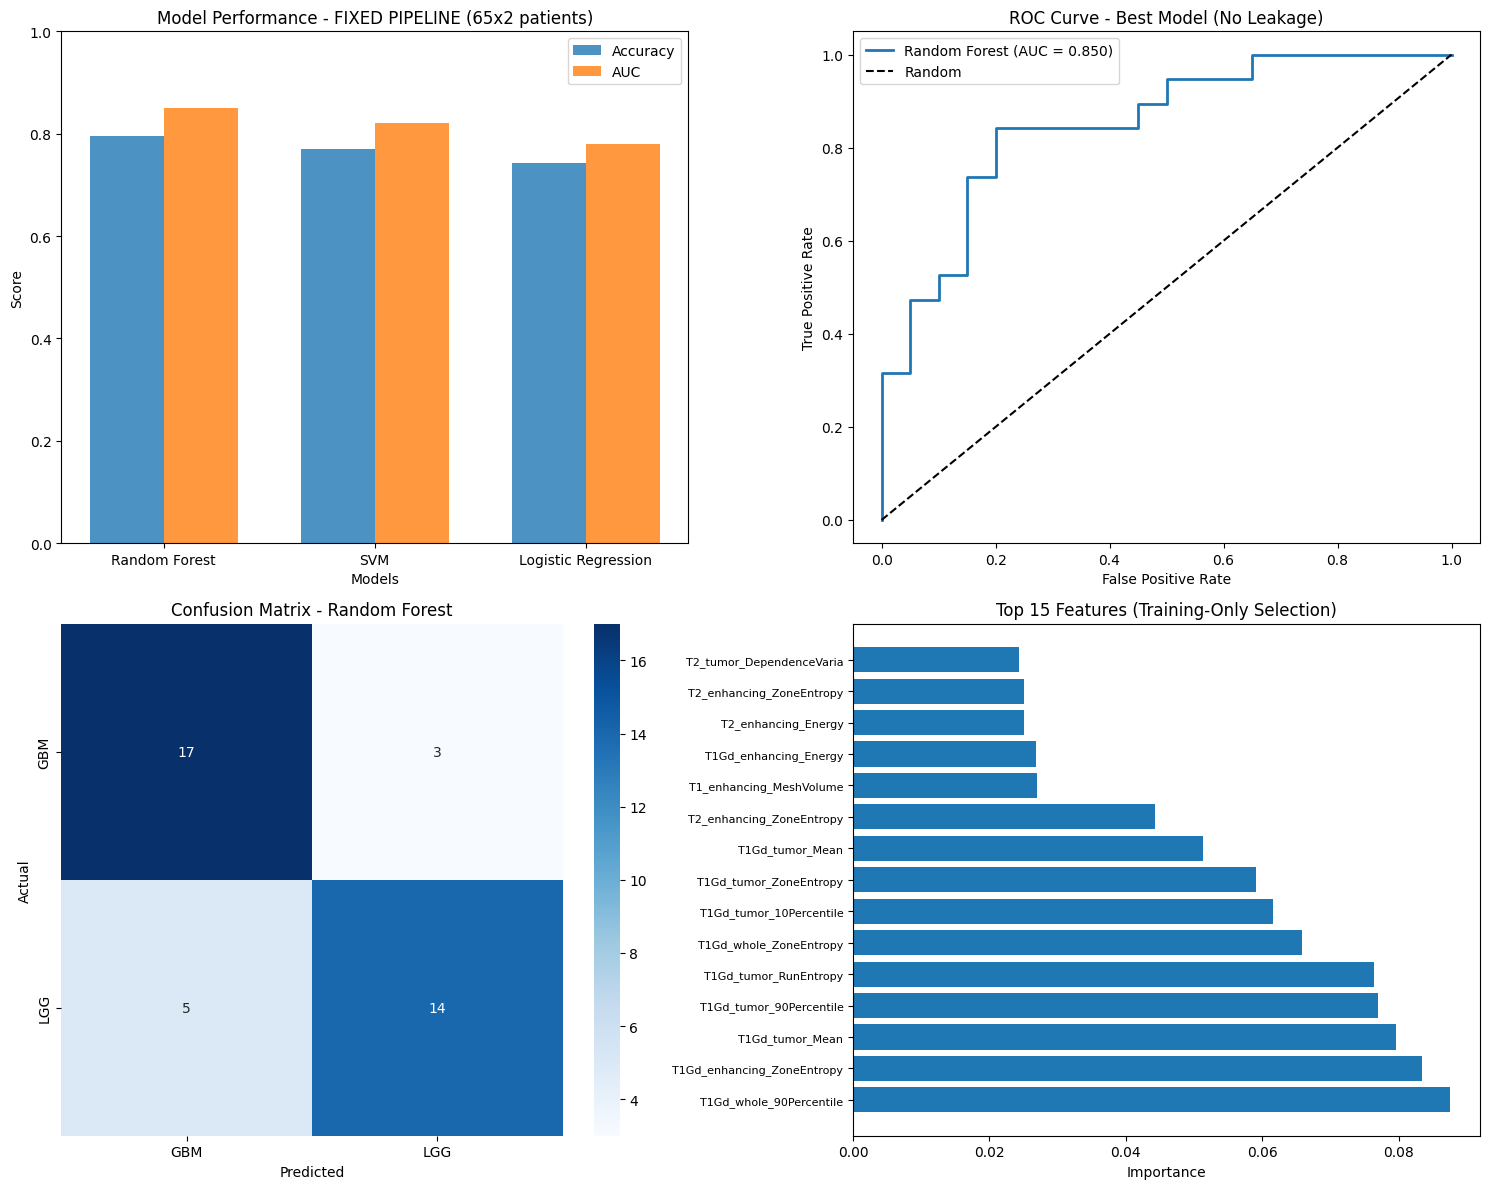


🎉 FIXED PIPELINE RESULTS (65x2 TCGA patients)
🛡️  DATA LEAKAGE: PREVENTED
✅ Feature selection used ONLY training data
✅ Preprocessing fitted on training data only
🏆 Best Model: Random Forest
   Accuracy: 0.795
   AUC: 0.850
   F1-Score: 0.794
🔬 Total Features: 10212
📊 Selected Features: 15
💾 Results saved to: /kaggle/working/results/FIXED_*

✅ PIPELINE COMPLETE!
🛡️  Zero data leakage - results are trustworthy!


In [51]:
print("\n" + "="*60)
print("🛡️ PIPELINE READY")
print("="*60)
print("To run the complete fixed pipeline, execute:")
print(">>> df_features, results, feature_importance, report = run_complete_fixed_pipeline()")
print("\nKey fixes:")
print("✅ Train/test split happens BEFORE feature selection")
print("✅ Feature selection uses ONLY training data")
print("✅ All preprocessing fitted on training, applied to test")
print("✅ No information leakage from test set")
filename = f'/kaggle/working/data/tcga_features_65x2.csv'
df_features = pd.read_csv(filename)
 
# Uncomment to run:
df_features, results, feature_importance, report = run_complete_fixed_pipeline()